# Pypi/conda download statistics of napari plugins
This notebook visualizes download statistics of napari plugins downloaded from pypi and conda. It uses the APIs of the [napari hub](https://www.napari-hub.org/) and [pypistats](https://pypistats.org/) and [condastats](https://condastats.readthedocs.io/) (big thanks to the data providers!).

Before over-interpreting the presented data, please be aware of:
* the number of downloads is typically higher than the number of users,
* plugins that are dependencies of other plugins appear downloaded more often,
* plugins downloaded via conda and pypi may be counted differently,
* plugins that serve as python libraries also for other purposes may be overestimated in the napari-plugin context,
* plugins downloaded via automated test suites may be counted as well and
* [gamification](https://en.wikipedia.org/wiki/Gamification).

In [1]:
# conda install condastats 
# pip install pypistats

In [2]:
import pandas as pd
import urllib, json
import matplotlib.pyplot as plt
import time
import numpy as np

from condastats.cli import overall, pkg_platform, pkg_version, pkg_python, data_source
from pypistats import overall as overall_pypi

month = '2023-02'
start_date = '2023-02-01'
end_date = '2023-02-28'

In [3]:
# check which months exist on conda
p = pkg_python('devbio-napari', monthly=True)
p

pkg_name       time     pkg_python
devbio-napari  2022-04                 304
               2022-05                 391
               2022-06                 842
               2022-07                1994
               2022-08                 423
               2022-09                1583
               2022-10                 988
               2022-11                 665
               2022-12                 436
               2023-01                 271
               2023-02                 272
Name: counts, dtype: int64

In [4]:
# check which months exist on conda
p = pkg_python('napari', monthly=True)
p

pkg_name  time     pkg_python
napari    2020-02                  39
          2020-03                 150
          2020-04                 235
          2020-05                 788
          2020-06                1012
          2020-07                 797
          2020-08                 499
          2020-09                 759
          2020-10                1346
          2020-11                 725
          2020-12                 535
          2021-01                 482
          2021-02                1036
          2021-03                2191
          2021-04                1830
          2021-05                1184
          2021-06                1528
          2021-07                1773
          2021-08                2442
          2021-09                1734
          2021-10                1746
          2021-11                1273
          2021-12                1260
          2022-01                1717
          2022-02                2201
          2022-03   

In [5]:
def get_all_plugin_data():
    url = 'https://api.napari-hub.org/plugins'

    json_url = urllib.request.urlopen(url) 
    data = json.loads(json_url.read()) 
    #print (data)
    return data

def get_plugin_index():
    data = get_all_plugin_data()
    return list(data.keys())

all_plugins = get_plugin_index()

df = pd.DataFrame({'plugin':all_plugins})

In [6]:
def add_condastats(df):
    conda_downloads = []
    for name in df['plugin']:
        name = name.lower()
        print(name)
        try:
            p = pkg_python(name, month=month)
            num_downloads = p[0]
        except:
            print("Error")
            num_downloads = np.nan
        conda_downloads.append(num_downloads)

    df['conda_downloads'] = conda_downloads

add_condastats(df)

image-composer
image-part-selecter
label-creator
layer-data-replace
offset-subtraction
partseg
partseg-smfish
partial-aligner
platymatch
redlionfish
world2data
affinder
allencell-ml-segmenter
Error
anchor-droplet-chip
Error
arcos-gui
avidaq
bbii-decon
beetlesafari
bfio
Error
blik
brainglobe-napari-io
brainreg-napari
Error
brainreg-segment
btrack
cellfinder-napari
cellpose-napari
devbio-napari
disease-classifier
Error
elastix-napari
Error
empanada-napari
Error
faser
Error
grabber-ift
guanine-crystal-analysis
hesperos
iacs-ipac-reader
ilastik-napari
Error
imaxt-multiscale-plugin
Error
in-silico-fate-mapping
Error
koopa-viz
mikro-napari
Error
misic-napari
morphometrics
morphometrics-engine
Error
morphospaces
Error
napari-3d-ortho-viewer
napari-deepspot
napari-ids
Error
napari-ip-workflow
napari-ism
napari-j
napari-lf
Error
napari-philow
napari-picasso
napari-accelerated-pixel-and-object-classification
napari-affinities
Error
napari-aicsimageio
napari-aideveloper
Error
napari-allencell-ann

In [7]:
df

,plugin,conda_downloads
0,Image-Composer,8.0
1,Image-Part-Selecter,8.0
2,Label-Creator,7.0
3,Layer-Data-Replace,9.0
4,Offset-Subtraction,9.0
5,PartSeg,237.0
6,PartSeg-smfish,26.0
7,Partial-Aligner,8.0
8,PlatyMatch,59.0
9,RedLionfish,195.0


In [8]:
def add_pypistats(df):
    pypi_downloads = []
    for name in df['plugin']:
        print(name)
        try:
            time.sleep(5)
            o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)
            without_mirrors = o[o['category']  == 'without_mirrors']
            num_downloads = without_mirrors['downloads'].sum()
        except:
            print("Error")
            num_downloads = np.nan
        pypi_downloads.append(num_downloads)

    df['pypi_downloads'] = pypi_downloads

add_pypistats(df)

Image-Composer
Image-Part-Selecter
Label-Creator
Layer-Data-Replace
Offset-Subtraction
PartSeg
PartSeg-smfish
Partial-Aligner
PlatyMatch
RedLionfish
World2Data
affinder
allencell-ml-segmenter
Error
anchor-droplet-chip
Error
arcos-gui
avidaq
bbii-decon
beetlesafari
bfio
blik
brainglobe-napari-io
brainreg-napari
brainreg-segment
btrack
cellfinder-napari
cellpose-napari
devbio-napari
disease-classifier
elastix-napari
empanada-napari
faser
grabber-ift
guanine-crystal-analysis
hesperos
iacs-ipac-reader
ilastik-napari


C:\Users\haase\AppData\Local\Temp\ipykernel_19716\2625326076.py:7: UserWarning: Requested start date (2023-02-01) is before earliest available data (2023-02-28), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


imaxt-multiscale-plugin
in-silico-fate-mapping


C:\Users\haase\AppData\Local\Temp\ipykernel_19716\2625326076.py:7: UserWarning: Requested start date (2023-02-01) is before earliest available data (2023-02-27), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


koopa-viz
mikro-napari
misic-napari
morphometrics
morphometrics-engine
morphospaces
napari-3d-ortho-viewer
napari-DeepSpot
napari-IDS
napari-IP-workflow
napari-ISM
napari-J
napari-LF
napari-PHILOW
napari-PICASSO
napari-accelerated-pixel-and-object-classification
napari-affinities
napari-aicsimageio
napari-aideveloper
napari-allencell-annotator
napari-allencell-segmenter
napari-amdtrk
Error
napari-animated-gif-io
napari-animation
napari-annotate
napari-annotator
napari-annotatorj
napari-apple
napari-apr-viewer
napari-arboretum
napari-assistant
napari-assistant-plugin-generator
napari-bacseg


C:\Users\haase\AppData\Local\Temp\ipykernel_19716\2625326076.py:7: UserWarning: Requested start date (2023-02-01) is before earliest available data (2023-02-24), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-bbox
Error
napari-bigfish
Error
napari-bigwarp
napari-bil-data-viewer
napari-bio-sample-data
napari-bioformats
napari-bioimageio
napari-bleach-correct
napari-blender-bridge
Error
napari-blob-detection
napari-blossom
napari-boids
napari-boxmanager
napari-brainbow-diagnose
napari-brightness-contrast
napari-brushsettings
napari-bud-cell-segmenter
napari-buds
napari-calibration
napari-ccp4map
napari-cell-centroid-annotator
Error
napari-cellseg3d
napari-checkerboard
napari-cilia-beating-frequency
napari-clemreg
napari-clusters-plotter
napari-compressed-labels-io
napari-conidie
napari-console
napari-cookiecut
napari-crop
napari-cryofibsem-monitor
napari-cupy-image-processing
napari-curtain
napari-czann-segment
napari-czifile2
napari-data-preview


C:\Users\haase\AppData\Local\Temp\ipykernel_19716\2625326076.py:7: UserWarning: Requested start date (2023-02-01) is before earliest available data (2023-02-17), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-deepfinder
napari-deeplabcut
napari-deepmeta
napari-denoiseg
napari-dexp
napari-dv
napari-dvid
napari-dzi-zarr
napari-ehooke
Error
napari-elementary-numpy-operations
napari-em-reader
napari-error-reporter
napari-feature-classifier
napari-features
napari-features-selector
Error
napari-filament-annotator
napari-filaments
napari-file-watcher
napari-folder-browser
napari-generic-SIMulator
napari-geojson
napari-griottes
Error
napari-gruvbox
napari-hdf5-labels-io
napari-help
napari-hierarchical
napari-hough-circle-detector
Error
napari-image-stacker
napari-imaris-loader
napari-imc
napari-imsmicrolink
napari-input-visualizer
napari-itk-io
napari-kics
napari-label-interpolator
napari-labelimg4classification
napari-labeling
napari-labelling-assistant
napari-labels-overlap
napari-large-image-importer


C:\Users\haase\AppData\Local\Temp\ipykernel_19716\2625326076.py:7: UserWarning: Requested start date (2023-02-01) is before earliest available data (2023-02-21), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-lattice
napari-layer-details-display
napari-layer-table
napari-lazy-openslide
napari-listener
Error
napari-live-flim
napari-live-recording
napari-locpix
napari-macrokit
napari-manual-transforms
napari-mat-file-reader
napari-mat-images
napari-math
napari-matplotlib
napari-medical-image-formats
napari-merge-stardist-masks
napari-meshio
Error
napari-metroid
napari-micromanager
napari-microscope
napari-mm3
napari-molecule-reader
napari-mouse-controls
napari-mrcfile-handler
napari-mrcfile-reader
napari-mri
napari-multitask
napari-n2v
napari-nD-annotator
napari-nasa-samples
napari-nd-cropper
napari-nd2-folder-viewer
napari-ndev
napari-ndtiffs
napari-nibabel


C:\Users\haase\AppData\Local\Temp\ipykernel_19716\2625326076.py:7: UserWarning: Requested start date (2023-02-01) is before earliest available data (2023-02-10), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-nikon-nd2
napari-nlm
napari-nucleaizer
napari-obj
Error
napari-omaas
napari-ome-zarr
napari-omero
napari-organoid-counter
napari-owncloud
napari-patchcreator
napari-pdf-reader
napari-pdr-reader
napari-pixel-correction
napari-plot
napari-plot-profile
napari-plugin-search
napari-pointslayer-projection


C:\Users\haase\AppData\Local\Temp\ipykernel_19716\2625326076.py:7: UserWarning: Requested start date (2023-02-01) is before earliest available data (2023-02-14), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-power-spectrum
napari-power-widgets
napari-pram
napari-process-points-and-surfaces
napari-proofread-brainbow
napari-properties-plotter
napari-properties-viewer
napari-psf-analysis
napari-psf-simulator
napari-pssr
napari-pyclesperanto-assistant
napari-pymeshlab
napari-pystackreg
napari-qrcode


C:\Users\haase\AppData\Local\Temp\ipykernel_19716\2625326076.py:7: UserWarning: Requested start date (2023-02-01) is before earliest available data (2023-02-21), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-quoll
napari-result-stack
napari-rioxarray
napari-roi
napari-roi-registration
napari-sairyscan
napari-sam
Error
napari-sc3D-viewer
napari-script-editor
napari-sdeconv
napari-segment
napari-segment-anything
Error
napari-segment-blobs-and-things-with-membranes
napari-serialcellpose
napari-sif-reader
napari-sift-registration
napari-sim-processor
napari-simpleitk-image-processing
napari-skimage-regionprops
napari-solarized
napari-spacetx-explorer
napari-spatial-omics
napari-spatialdata
napari-splinedist
napari-splineit
napari-spreadsheet
napari-stable-diffusion
napari-steinpose
napari-stl-exporter
napari-stracking
napari-stress
napari-subboxer
napari-svetlana
napari-svg
napari-tabu
napari-text-layer
napari-tiler
napari-time-series-plotter
napari-time-slicer
napari-timeseries-opener-plugin
napari-tissuumaps
napari-tomocube-data-viewer
Error
napari-tomodl
Error
napari-tomoslice
napari-tomotwin
Error
napari-tracks-reader
napari-trait2d
napari-turing
napari-tyssue
napari-ui-tracer
Error

In [9]:
# df

In [10]:
df.to_csv("stats_" + month + ".csv")

In [11]:
def remove_nans_and_shipped_with_napari_plugins(df):
    # remove plugins that are part of the napari distribution
    remove_plugins = ["napari-console", "napari-svg"]
    df = df[[x not in remove_plugins for x in df['plugin']]]

    # remove nans
    df = df.dropna()
    
    return df

df = remove_nans_and_shipped_with_napari_plugins(df)

In [12]:
df = df.sort_values('conda_downloads', ascending=False)

In [13]:
df

,plugin,conda_downloads,pypi_downloads
287,skan,810.0,5750.0
26,devbio-napari,272.0,149.0
5,PartSeg,237.0,717.0
9,RedLionfish,195.0,119.0
284,psfmodels,176.0,76.0
68,napari-assistant,161.0,636.0
23,btrack,155.0,351.0
252,napari-time-slicer,150.0,815.0
226,napari-segment-blobs-and-things-with-membranes,145.0,725.0
232,napari-skimage-regionprops,128.0,1327.0


In [14]:
# reindex to make the plotting work
df = pd.DataFrame(df.to_dict(orient='list'))

## condastats

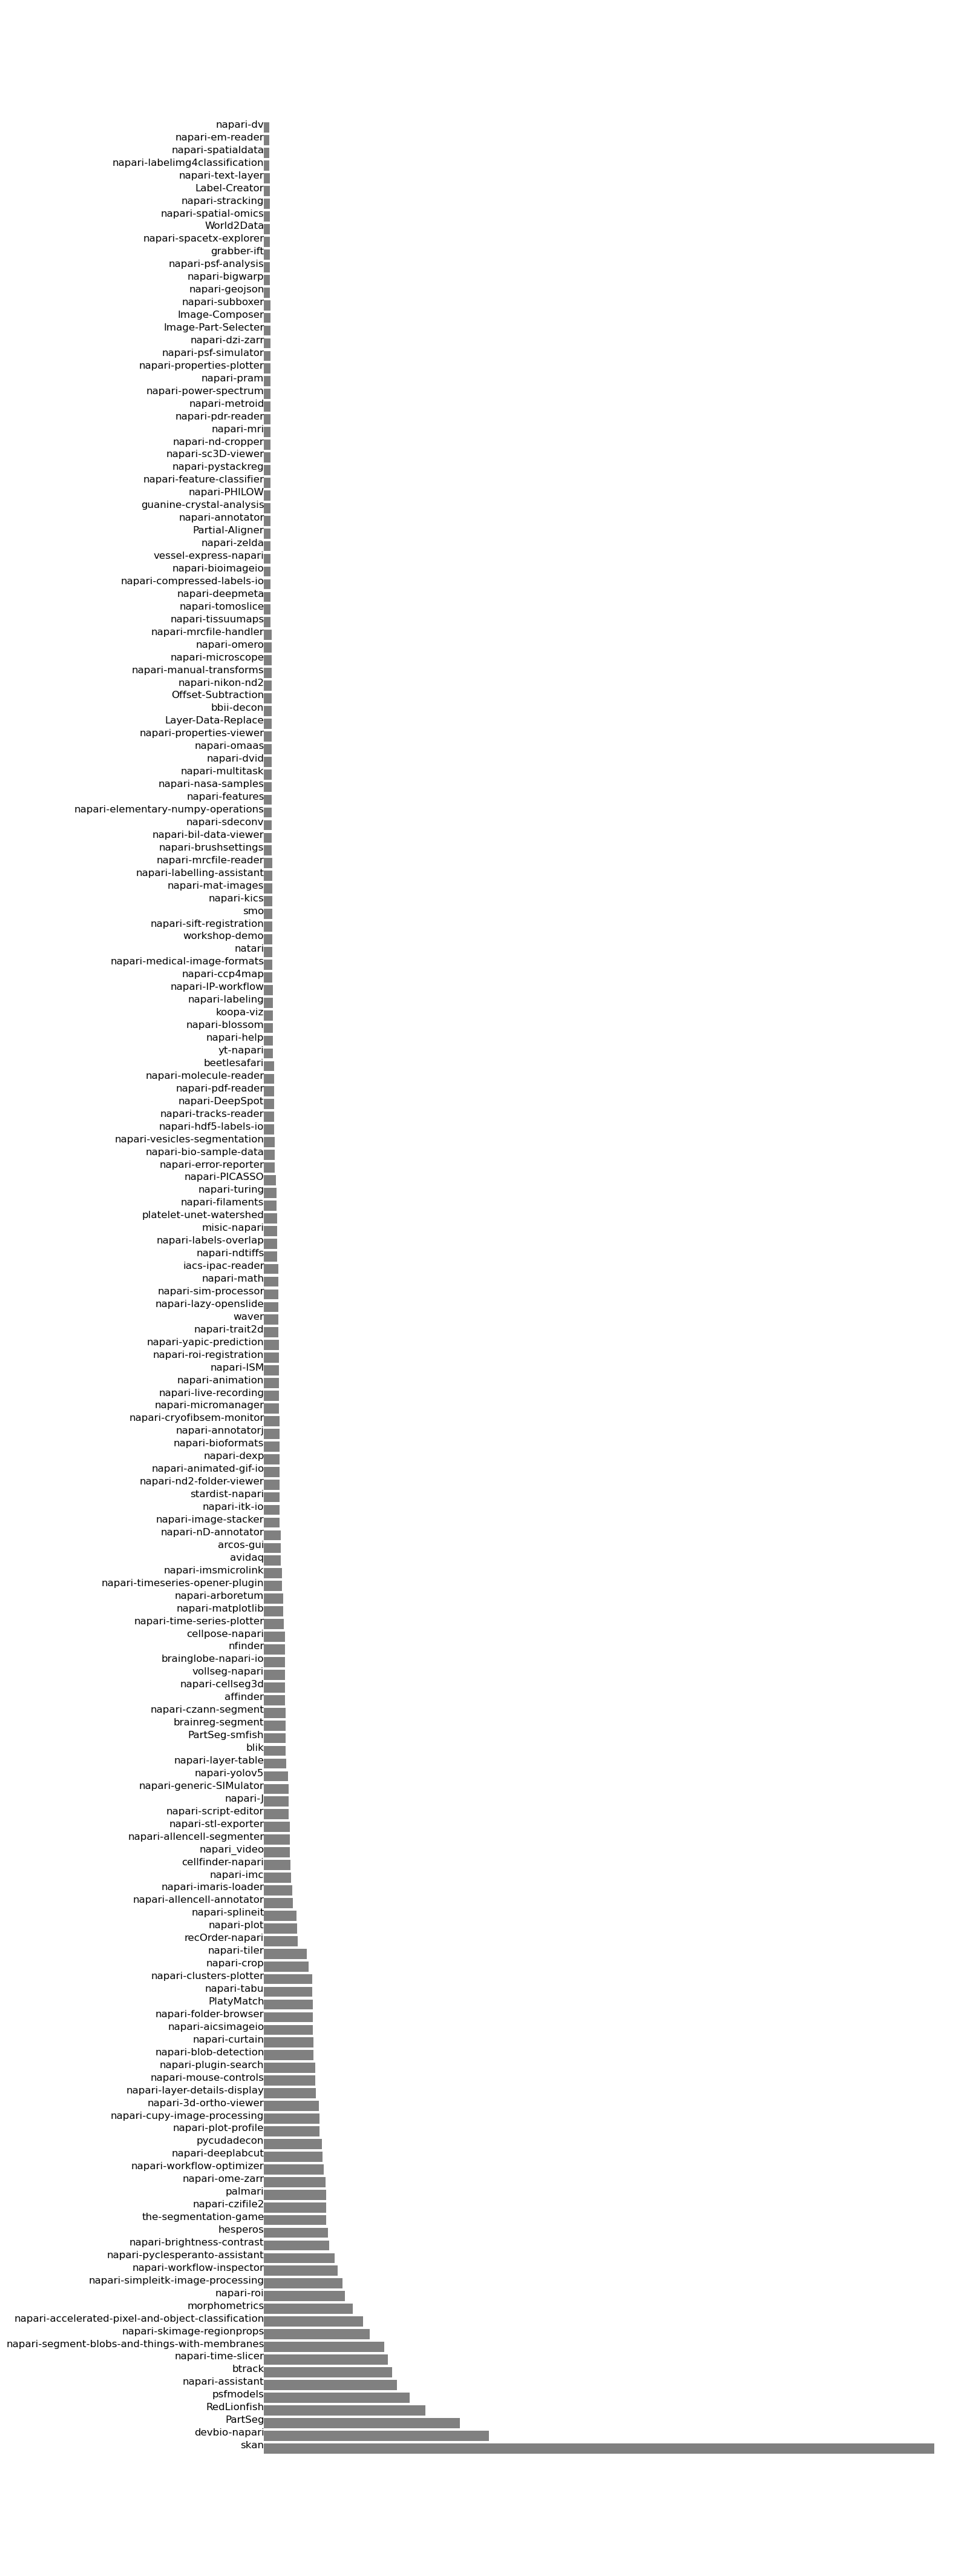

In [15]:
def plot_data(df, column='conda_downloads', width=15,height=55):
    f, ax = plt.subplots(1,1,figsize=(width,height))
    # ax = plt.subplot(111, fig_size=(15, 15))
    #df[column].plot(ax=ax, kind='barh', title='ranking')
    ax.axis('off')
    for i, x in enumerate(df['plugin']):
        plt.barh(i, df[column][i], color = 'grey')
        ax.text(0, i, x, ha='right', fontsize='large')
        
plot_data(df)

## condastats vs. pypistats

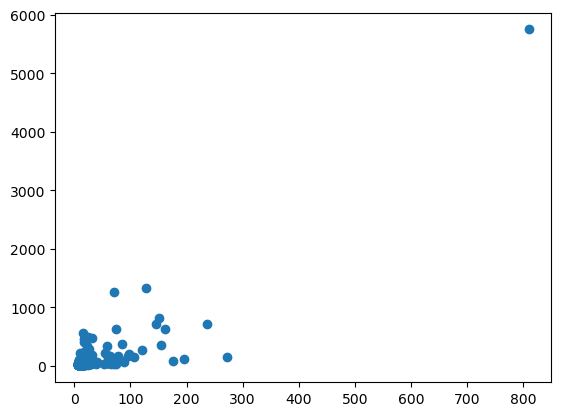

In [16]:
plt.scatter(df['conda_downloads'], df['pypi_downloads'])

## pypistats

In [17]:
# reload the data because we removed entries with NaNs in the pypi column earlier
df = pd.read_csv("stats_" + month + ".csv")
df = df[["plugin", "pypi_downloads"]]

df = remove_nans_and_shipped_with_napari_plugins(df)

In [18]:
df = df.sort_values('pypi_downloads', ascending=False)
df

,plugin,pypi_downloads
287,skan,5750.0
18,bfio,1508.0
296,vollseg-napari-trackmate,1339.0
232,napari-skimage-regionprops,1327.0
109,napari-deeplabcut,1265.0
83,napari-boxmanager,1122.0
252,napari-time-slicer,815.0
226,napari-segment-blobs-and-things-with-membranes,725.0
5,PartSeg,717.0
68,napari-assistant,636.0


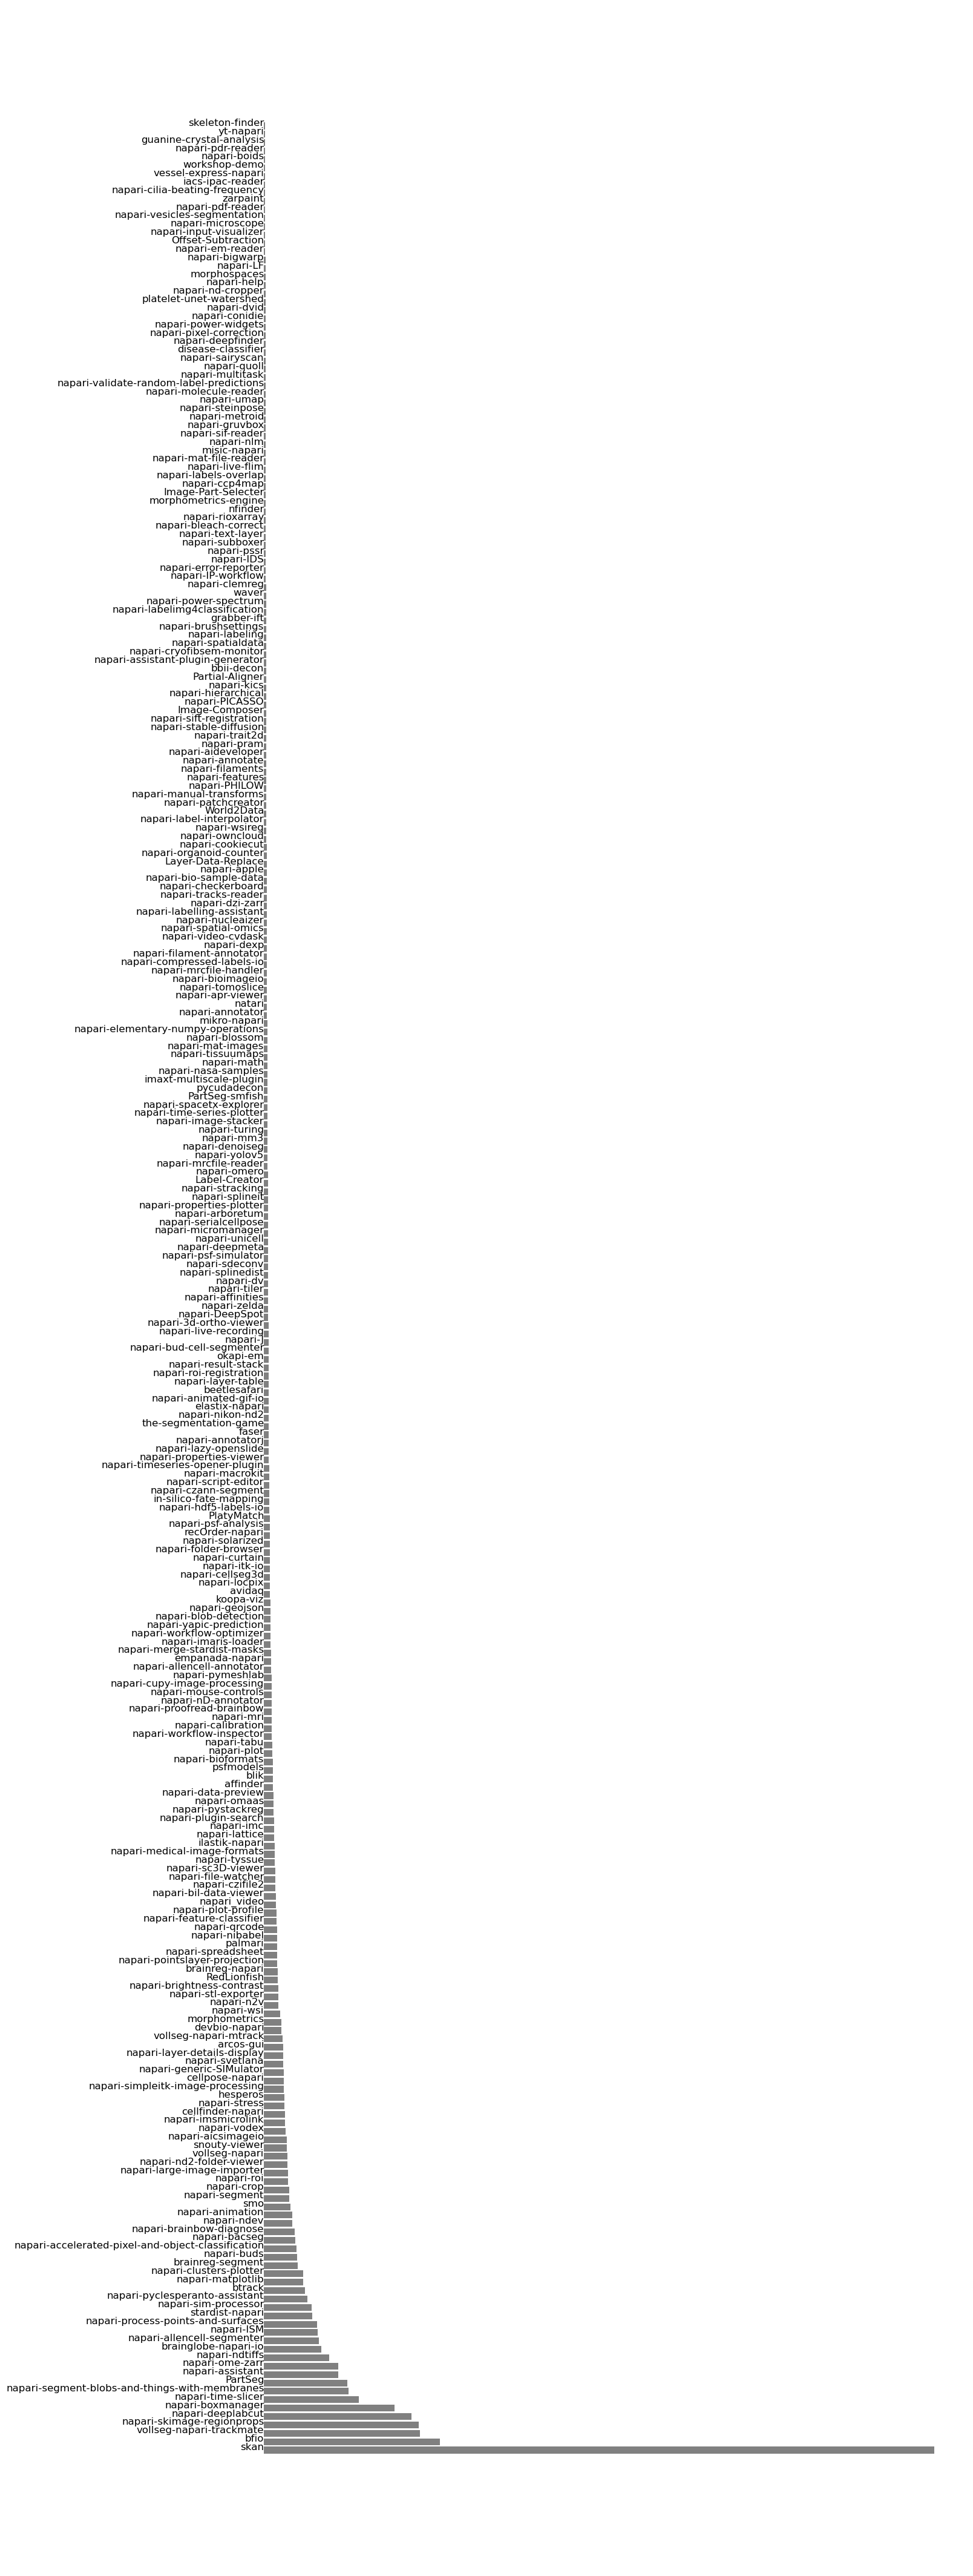

In [19]:
# reindex to make the plotting work
df = pd.DataFrame(df.to_dict(orient='list'))

plot_data(df, column='pypi_downloads')